## Step 0: Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Step 1: Importing Data

In [2]:
df = pd.read_csv('data.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000


### Plotting the value of attribute High with Date

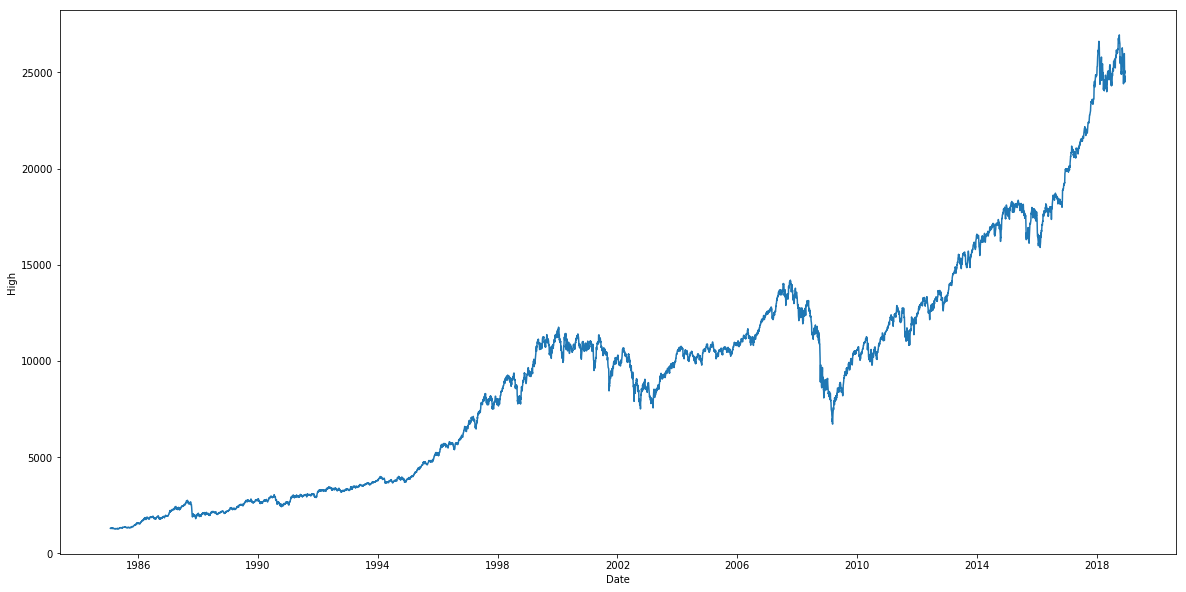

In [3]:
ax, fig = plt.subplots(figsize=(20,10))
sns.lineplot(x = df['Date'], y = df['High'])

In [4]:
df_date = df.set_index('Date')

## Step 2: Train Test Split

In [5]:
X_train = df_date[:'2017']
X_test = df_date['2017':]

In [6]:
X_train.shape, X_test.shape

((8300, 6), (489, 6))

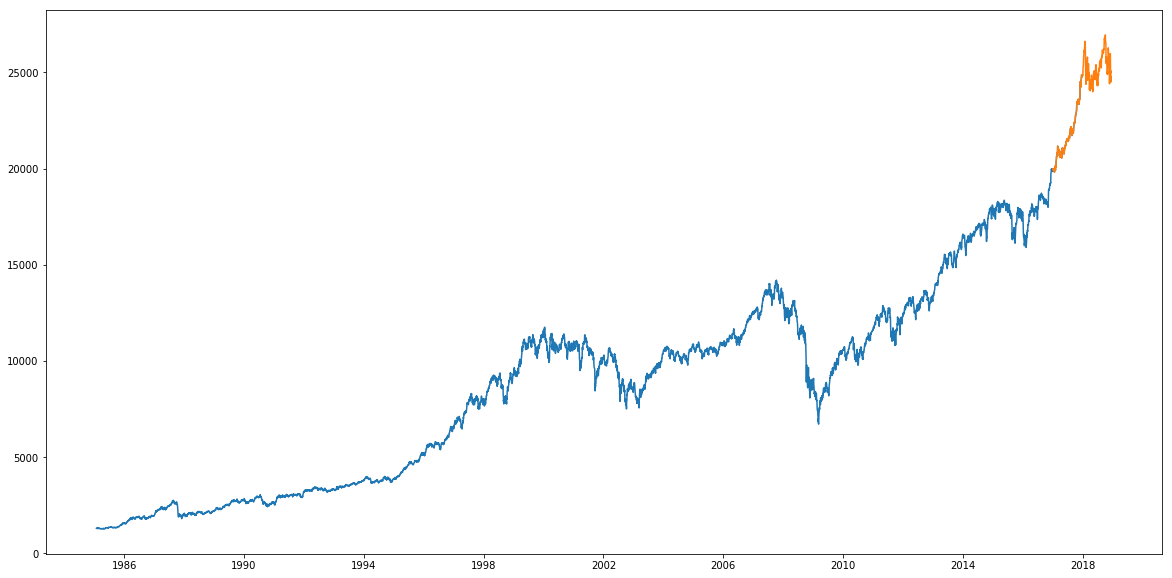

In [7]:
ax, fig = plt.subplots(figsize=(20,10))
plt.plot(X_train['High'])
plt.plot(X_test['High'])

In [8]:
X_train_high = X_train['High']
X_test_high = X_test['High']

In [9]:
X_train_high = np.array(X_train_high)
X_test_high = np.array(X_test_high)

## Step 3: Min Max Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler()
sc.fit(X_train_high.reshape(-1,1))
X_train_scaled = sc.transform(X_train_high.reshape(-1,1))
#X_test_scaled = sc.transform(X_test_high.reshape(-1,1))


## Step 4: Preparing Dataset for Training

In [11]:
window_size = 90

In [12]:
def prepare_data(dataset, window_size):
    X = []
    y = []
    for i in range(window_size,len(dataset)):
        X.append(dataset[i-window_size:i,0])
        y.append(dataset[i,0])

    return np.array(X), np.array(y)

In [13]:
X_train_new, y_train_new = prepare_data(X_train_scaled, window_size)


In [14]:
df_ = df_date[len(df_date) - len(X_test) - window_size:].values
_X_test = np.array(df_[:,1])
_X_test_scaled = sc.transform(_X_test.reshape(-1,1))
X_test_new, y_test_new = prepare_data(_X_test_scaled, window_size)
_X_test_scaled.shape


(579, 1)

In [15]:
X_train_new.shape, y_train_new.shape, X_test_new.shape, y_test_new.shape

((8210, 90), (8210,), (489, 90), (489,))

In [16]:
X_train_new[0] , y_train_new[0]

(array([0.0018743 , 0.00228107, 0.00178583, 0.00147726, 0.00185102,
        0.00211303, 0.00183239, 0.00193991, 0.00194456, 0.00171557,
        0.00135112, 0.00226245, 0.00238393, 0.00190732, 0.00153313,
        0.00174816, 0.00151916, 0.00149589, 0.00135112, 0.00177652,
        0.00186499, 0.0015708 , 0.00248679, 0.00225779, 0.00206605,
        0.00193525, 0.00135578, 0.00125292, 0.00109377, 0.00119662,
        0.00114541, 0.00076191, 0.00066371, 0.00041143, 0.00097228,
        0.00110816, 0.00117334, 0.00110816, 0.00072466, 0.00069207,
        0.00083218, 0.00102858, 0.00082286, 0.00106117, 0.00122498,
        0.00071535, 0.00055154, 0.00066879, 0.00045842, 0.00075725,
        0.00100064, 0.00081355, 0.00089779, 0.00107514, 0.00111281,
        0.00129948, 0.00090244, 0.000949  , 0.00134181, 0.00149122,
        0.00160805, 0.00165462, 0.00113143, 0.00063577, 0.00049101,
        0.        , 0.00011217, 0.00021969, 0.00043006, 0.0003272 ,
        0.00060783, 0.00132276, 0.00136974, 0.00

In [17]:
X_train_new = np.reshape(X_train_new , newshape=( len(X_train)-window_size , window_size, 1))
y_train_new = np.reshape(y_train_new , newshape=( len(X_train)-window_size , 1))
X_test_new = np.reshape(X_test_new , newshape=( len(X_test)  , window_size, 1))
y_test_new = np.reshape(y_test_new , newshape=( len(X_test)  ,1))

## Step 5: Modelling Data

In [18]:
from tensorflow.python.keras.datasets import imdb
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM, SimpleRNN, Dropout, Flatten
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.optimizers import Adam

In [30]:
model = Sequential()

model.add(SimpleRNN(50, return_sequences= True , input_shape = (window_size,1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(50, return_sequences= True ))
model.add(Dropout(0.2))

model.add(SimpleRNN(50 ))

model.add(Dense(1, activation='linear'))

In [37]:
model.compile(loss='mse', optimizer='Adam')

In [38]:
model_history = model.fit(X_train_new, y_train_new, epochs=8, batch_size=64)

Epoch 1/8
8210/8210 [==============================] - 26s 3ms/step - loss: 9.0764e-04
Epoch 2/8
8210/8210 [==============================] - 28s 3ms/step - loss: 2.9506e-04
Epoch 3/8
8210/8210 [==============================] - 28s 3ms/step - loss: 2.8863e-04
Epoch 4/8
8210/8210 [==============================] - 31s 4ms/step - loss: 2.9111e-04
Epoch 5/8
8210/8210 [==============================] - 33s 4ms/step - loss: 2.5719e-04
Epoch 6/8
8210/8210 [==============================] - 33s 4ms/step - loss: 2.6291e-04
Epoch 7/8
8210/8210 [==============================] - 32s 4ms/step - loss: 2.6155e-04
Epoch 8/8
8210/8210 [==============================] - 34s 4ms/step - loss: 2.3897e-04


In [22]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 90, 50)            2600      
_________________________________________________________________
dropout (Dropout)            (None, 90, 50)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 90, 50)            5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 12,751
Trainable params: 12,751
Non-trainable params: 0
_________________________________________________________________
None


## Step 6: Saving Model

In [23]:
model.save_weights('model_v1.h5')

## Step 7: Visualizing the Losses

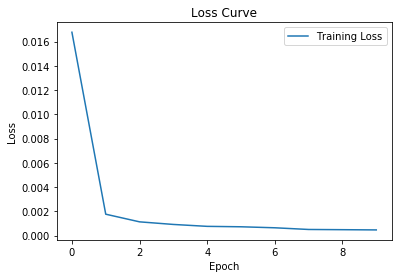

In [24]:

tra_loss = model_history.history['loss']

plt.plot(tra_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend([ 'Training Loss'])
plt.show()

## Step 8: Testing Your Neural Network

In [39]:
y_pred = model.predict(X_test_new)

In [40]:
y_pred = sc.inverse_transform(y_pred)

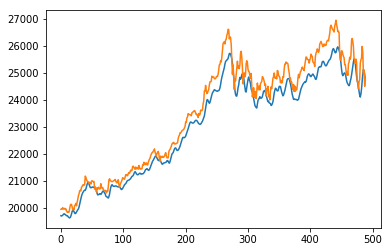

In [41]:
plt.plot(y_pred)
plt.plot( sc.inverse_transform(y_test_new))

In [42]:
rms=np.sqrt(np.mean(np.power((y_pred-sc.inverse_transform(y_test_new)),2)))

In [43]:
rms

520.4859092827628